# CMPT419 Group Project Image Analysis

#Install OpenFace

[OpenFace](https://github.com/TadasBaltrusaitis/OpenFace)

In [1]:
import os
from os.path import exists, join, basename, splitext

################# Need to revert back to CUDA 10.0 ##################
# Thanks to http://aconcaguasci.blogspot.com/2019/12/setting-up-cuda-100-for-mxnet-on-google.html
#Uninstall the current CUDA version
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

#Download CUDA 10.0
!wget  --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
#install CUDA kit dpkg
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-10-0
#Slove libcurand.so.10 error
!wget --no-clobber http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
#-nc, --no-clobber: skip downloads that would download to existing files.
!apt install ./nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
!apt-get update
####################################################################

git_repo_url = 'https://github.com/TadasBaltrusaitis/OpenFace.git'
project_name = splitext(basename(git_repo_url))[0]
# clone openface
!git clone -q --depth 1 $git_repo_url

# install new CMake becaue of CUDA10
!wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
!tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local

# Get newest GCC
!sudo apt-get update
!sudo apt-get install build-essential 
!sudo apt-get install g++-8

# install python dependencies
!pip install -q youtube-dl

# Finally, actually install OpenFace
!cd OpenFace && bash ./download_models.sh && sudo bash ./install.sh

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: opencv-4.1.0/samples/dnn/object_detection.cpp  
  inflating: opencv-4.1.0/samples/dnn/object_detection.py  
  inflating: opencv-4.1.0/samples/dnn/openpose.cpp  
  inflating: opencv-4.1.0/samples/dnn/openpose.py  
  inflating: opencv-4.1.0/samples/dnn/segmentation.cpp  
  inflating: opencv-4.1.0/samples/dnn/segmentation.py  
  inflating: opencv-4.1.0/samples/dnn/shrink_tf_graph_weights.py  
  inflating: opencv-4.1.0/samples/dnn/text_detection.cpp  
  inflating: opencv-4.1.0/samples/dnn/text_detection.py  
  inflating: opencv-4.1.0/samples/dnn/tf_text_graph_common.py  
  inflating: opencv-4.1.0/samples/dnn/tf_text_graph_faster_rcnn.py  
  inflating: opencv-4.1.0/samples/dnn/tf_text_graph_mask_rcnn.py  
  inflating: opencv-4.1.0/samples/dnn/tf_text_graph_ssd.py  
   creating: opencv-4.1.0/samples/gpu/
  inflating: opencv-4.1.0/samples/gpu/CMakeLists.txt  
  inflating: opencv-4.1.0/samples/gpu/alpha_comp.cpp  
  inflating: opencv-4.1.0/samples/gpu/bg

# Load all the data

[OpenFace Command Line usage](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Command-line-arguments)

In [2]:
!pip install tslearn
!pip install umap

import pandas
import numpy
import glob
from typing import *
import umap
from sklearn import preprocessing
import tslearn.utils as tsutils
from tslearn.metrics import dtw
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
import matplotlib.pyplot as plt
from glob import glob
import json



  Stored in directory: C:\Users\susum\AppData\Local\pip\Cache\wheels\7b\29\33\b4d917dc95f69c0a060e2ab012d95e15db9ed4cc0b94ccac26
Successfully built umap


ImportError: cannot import name '_check_sample_weight' from 'sklearn.utils.validation' (D:\Anaconda\lib\site-packages\sklearn\utils\validation.py)

In [33]:
from importlib import reload
import logging
reload(logging)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

import os
DATASET_FILE = "training_dataset.zip"
full_path = os.path.abspath(DATASET_FILE[:-4])
if not os.path.exists(full_path):
    !unzip -o $DATASET_FILE;

Archive:  training_dataset.zip
   creating: training_dataset/
  inflating: training_dataset/1.mp4  
  inflating: training_dataset/10.mp4  
  inflating: training_dataset/100.mp4  
  inflating: training_dataset/101.mp4  
  inflating: training_dataset/102.mp4  
  inflating: training_dataset/103.mp4  
  inflating: training_dataset/104.mp4  
  inflating: training_dataset/105.mp4  
  inflating: training_dataset/106.mp4  
  inflating: training_dataset/107.mp4  
  inflating: training_dataset/108.mp4  
  inflating: training_dataset/109.mp4  
  inflating: training_dataset/11.mp4  
  inflating: training_dataset/110.mp4  
  inflating: training_dataset/111.mp4  
  inflating: training_dataset/112.mp4  
  inflating: training_dataset/113.mp4  
  inflating: training_dataset/114.mp4  
  inflating: training_dataset/115.mp4  
  inflating: training_dataset/116.mp4  
  inflating: training_dataset/117.mp4  
  inflating: training_dataset/118.mp4  
  inflating: training_dataset/119.mp4  
  inflating: training_

In [34]:
import glob
import subprocess
import os

directories = glob.glob("training_dataset/*")
output = "output"

for dir in directories:
    output_dir = "%s/%s" % (output, dir)
    #os.makedirs(output_dir)
    process = subprocess.Popen(["./OpenFace/build/bin/FeatureExtraction", "-f", dir, "-out_dir", output_dir])
    process.wait()

In [OpenFace's Wiki](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Output-Format), it shows what different column variables of csv files mean.

There are mainly 7 categories, which are basic, gaze related, pose, landmarks locations in 2D & 3D,rigid and non-rigid shape parameters and facial action units.

We use clip (1).mp4 as a sample to see the csv file.

In [36]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd, seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt 

# Load data
df = pd.read_csv('./output/training_dataset/1.mp4/1.csv')
# Print few values of data.
print(f"Max number of frames {df.frame.max()}", f"\nTotal shape of dataframe {df.shape}")
df.head()

Max number of frames 25 
Total shape of dataframe (25, 714)


frame   face_id   timestamp   confidence  ...   AU25_c   AU26_c   AU28_c   AU45_c
0      1         0        0.00         0.98  ...      0.0      0.0      0.0      0.0
1      2         0        0.04         0.98  ...      0.0      0.0      0.0      0.0
2      3         0        0.08         0.98  ...      0.0      0.0      0.0      0.0
3      4         0        0.12         0.98  ...      0.0      0.0      0.0      0.0
4      5         0        0.16         0.98  ...      0.0      0.0      0.0      0.0

[5 rows x 714 columns]

# **Preprocess function**


In [37]:
records = glob.glob("output/training_dataset/*/")
df = []
def preprocess(df) -> List[Any]:
    df = df[[
                    "frame",
                    "timestamp",
                    "gaze_angle_x",
                    "gaze_angle_y",
                    "pose_Rx",
                    "pose_Ry",
                    "pose_Rz",
                    "pose_Tx",
                    "pose_Ty",
                    "pose_Tz",
                    "AU01_r","AU02_r","AU04_r",
                    "AU05_r","AU06_r","AU07_r",
                    "AU09_r","AU10_r","AU12_r",
                    "AU14_r","AU15_r","AU17_r",
                    "AU20_r","AU23_r","AU25_r",
                    "AU26_r","AU45_r",
        ]].copy()
    df = pandas.DataFrame(preprocessing.scale(df), columns=df.columns)
    
    return df

In [38]:
CSV_EXT = ".csv"
TIME_SERIES_DATASETS_PATH = "output/timeseries"

UsedGifs = {}

def extract_time_series_dataset(path: str) -> List[Any]:
    if path[-1] == "/":
        path = path[:-1]
    dirs = glob.glob(f"{path}/*")

    time_series_list = []
    
    backup_file_name = path.split("/")[-1]
    backup_file_path = f"{TIME_SERIES_DATASETS_PATH}/{backup_file_name}.txt"

    created_count = 0
    time_series_labels = []

    for dir in dirs:
        filename = dir.split("/")[-1]
        csv_name = filename.split(".",1)[0]
        csv_filepath = f"{dir}/{csv_name}{CSV_EXT}"
        with open(csv_filepath) as f:
            name = csv_name + ".csv"
            df = pandas.read_csv(f, dtype=float)

            df.rename(columns=lambda x: x.strip(), inplace=True)

            if df.loc[:, "confidence"].mean() < 0.8:
                continue
            UsedGifs[filename] = True
            df.dropna()
            df_new = preprocess(df)

            formatted_time_series = tsutils.to_time_series(df_new)
            time_series_list.append(formatted_time_series)
            time_series_labels.append(dir)
            created_count += 1
    
    time_series_dataset = tsutils.to_time_series_dataset(time_series_list)

    tsutils.save_time_series_txt(backup_file_path, time_series_dataset)
    return time_series_dataset, time_series_labels

#Silhouette Score: 
[Silhouette coefficient introduction](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

Silhouette Coefficient = (x-y)/ max(x,y)
where, y is the mean intra cluster distance: mean distance to the other instances in the same cluster. x depicts mean nearest cluster distance.
The coefficient varies between -1 and 1. A value close to 1 implies that the instance is close to its cluster is a part of the right cluster. Whereas, a value close to -1 means that the value is assigned to the wrong cluster.

In [40]:
BACKUP = "backup"
OPENFACE_DATA = "output"

X_file = f"{BACKUP}/X"
X_labels_file = f"{BACKUP}/X_labels"

X = None
X_labels = None

X, X_labels = extract_time_series_dataset(f"{OPENFACE_DATA}/training_dataset/")
numpy.save(X_file, X)
numpy.save(X_labels_file, X_labels)

In [41]:
def calculate_BIC(X, labels):
    s_score: List[float] = []
        
    for num_cluster in num_clusters:
        km = TimeSeriesKMeans(n_clusters=num_cluster, metric="dtw").fit(X)
        labels = km.labels_
        score = silhouette_score(X, labels, metric="dtw")
        s_score.append(score)
    
    return s_score, X, labels

In [42]:
def plt_BIC(sil, X, labels, name):
    plt.plot(num_clusters, sil)
    plt.title('Silhouette Scores VS. Clusters')
    plt.ylabel('silhouette score')
    plt.xlabel('cluster amount')
    plt.show()

10:39:22 DEBUG:label 0:
    s1 = arg(0, name=s1)                     ['s1']
    s2 = arg(1, name=s2)                     ['s2']
    mask = arg(2, name=mask)                 ['mask']
    $0.1 = global(njit_accumulated_matrix: CPUDispatcher(<function njit_accumulated_matrix at 0x7fd9255cf268>)) ['$0.1']
    $0.5 = call $0.1(s1, s2, mask, func=$0.1, args=[Var(s1, metrics.py:97), Var(s2, metrics.py:97), Var(mask, metrics.py:97)], kws=(), vararg=None) ['$0.1', '$0.5', 'mask', 's1', 's2']
    cum_sum = $0.5                           ['$0.5', 'cum_sum']
    $0.6 = global(numpy: <module 'numpy' from '/usr/local/lib/python3.6/dist-packages/numpy/__init__.py'>) ['$0.6']
    $0.7 = getattr(value=$0.6, attr=sqrt)    ['$0.6', '$0.7']
    $const_-1 = const(int, -1)               ['$const_-1']
    $const_-1.1 = const(int, -1)             ['$const_-1.1']
    $const0.9 = build_tuple(items=[Var($const_-1, metrics.py:98), Var($const_-1.1, metrics.py:98)]) ['$const0.9', '$const_-1', '$const_-1.1']
    $0.

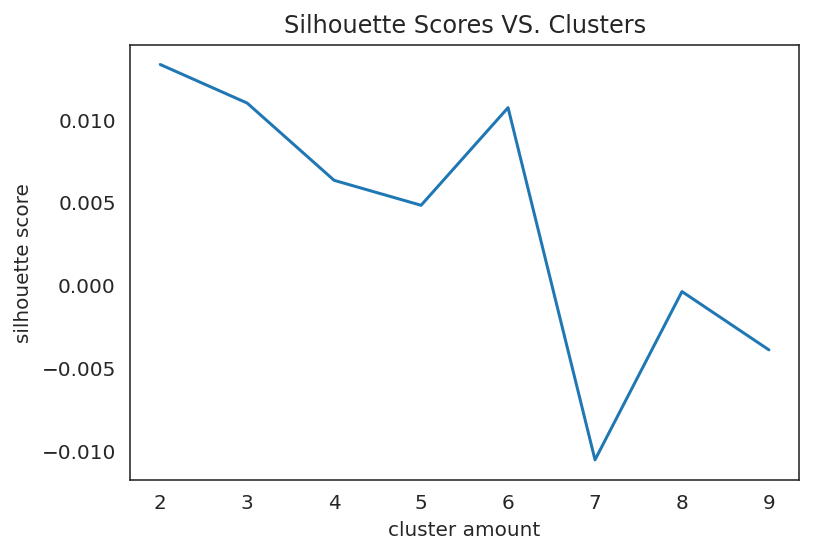

<Figure size 432x288 with 0 Axes>

In [43]:
num_clusters = numpy.arange(2, 10)
sil, X_, labels = calculate_BIC(X, X_labels)
plt_BIC(sil, X_, labels, "X")
plt.savefig("cluster.png")

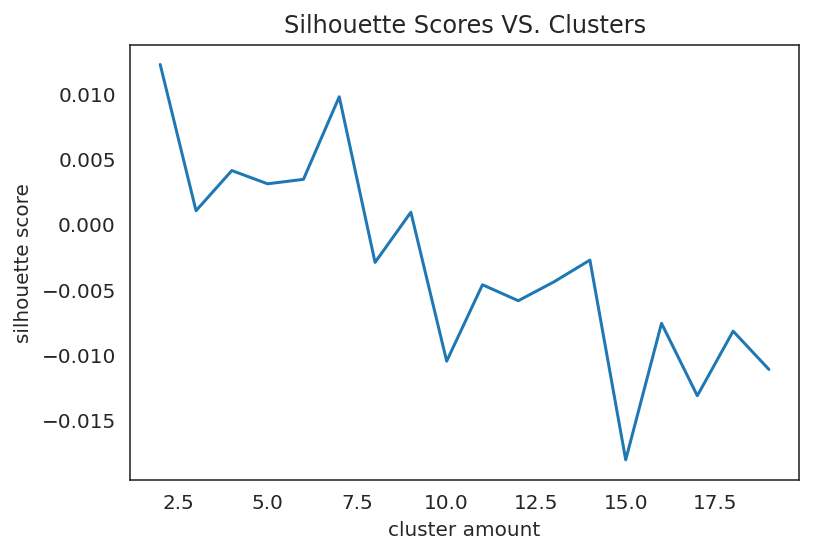

<Figure size 432x288 with 0 Axes>

In [44]:
num_clusters = numpy.arange(2, 20)
sil, X_, labels = calculate_BIC(X, X_labels)
plt_BIC(sil, X_, labels, "X")
plt.savefig("cluster2.png")

From two plots above, we can find that n=15 is a optimal cluster number. So we choose n=15 to find the social signal.

In [45]:
used_clusters = TimeSeriesKMeans(n_clusters=15, metric="dtw").fit(X)

In [46]:
def define_prototype(centroids, X):
    prototypes = {i: {"dist": float("inf"), "index": 0} for i in range(len(centroids))}
    for i, _ in enumerate(centroids):
        for j, _ in enumerate(X):
            dist = dtw(centroids[i], X[j])
            if dist < prototypes[i]["dist"]:
                prototypes[i] = {"dist": dist, "index": j}
    return prototypes

def define_prototypes(centroids, X, num_protos=5):
    if num_protos == 1:
        return
    prototypes: List[Tuple(float, int)] = []
    for i, _ in enumerate(centroids):
        tmp = []
        for j, _ in enumerate(X):
            dist = dtw(centroids[i], X[j])
            tmp.append((dist, j))
        tmp.sort(key=lambda tup: tup[0])
        prototypes.append(tmp[:num_protos])
    return prototypes

In [47]:
NUM_PROTOTYPES = 5

centroids_all_features = used_clusters.cluster_centers_
prototypes_all_features = define_prototype(centroids_all_features, X)
multiple_prototypes_all_features = define_prototypes(centroids_all_features, X, num_protos=NUM_PROTOTYPES)

print(multiple_prototypes_all_features)

[[(24.984164372816377, 102), (29.54104062961629, 175), (29.82951523151583, 95), (29.89479944574822, 65), (30.06125356632258, 79)], [(28.04235228493336, 152), (29.350966903977334, 98), (31.265621576912533, 88), (31.6350895608133, 145), (31.886806754257655, 31)], [(22.485110633308523, 13), (25.64075641826083, 104), (26.940744243156928, 12), (27.027267492016847, 160), (27.45254955828084, 15)], [(24.698965029943967, 82), (25.030125223412323, 147), (25.351091399281746, 175), (26.227472973455733, 77), (26.513183755933905, 123)], [(23.258954715810546, 114), (25.30570334947574, 121), (26.609665154166116, 53), (26.770430200405688, 0), (27.486294646660987, 97)], [(23.70992813465354, 171), (24.552851983991353, 35), (24.845215070687786, 60), (25.912064806172616, 170), (27.30298263224375, 29)], [(24.37759333492742, 191), (26.16416895972411, 9), (26.21229085325717, 154), (26.286519964658808, 15), (26.62361800912549, 77)], [(26.282094305313557, 194), (26.648901146830692, 106), (27.550685643819282, 20

In [48]:
import matplotlib.image as mpimg
GIFS = "./training_dataset"

def prototype_images(prototypes):
    # Getting dict of single proto
    if type(prototypes[0]) == dict:
        for key, _ in enumerate(prototypes):
                print(f"distance: {prototypes[key]['dist']}")
                # Get OpenDace data path from prototype index
                openface_dir = X_labels[(prototypes[key]["index"])]
                gif_Name = openface_dir.split("/")[-1]
                gif_name = gif_name.split(".",1)[0]
                print(gif_name)

                gif_path = f"{GIFS}/{gif_name}.mp4"

                print(f"{openface_dir}/{gif_name}.avi")
                with open(f"{openface_dir}/{gif_name}_aligned/frame_det_00_000001.jpg",'rb') as file:
                    display(Image(file.read()))
                    
    # Getting list of multiple protos
    else:
        for key, cluster in enumerate(prototypes):
            print("\n——————————————————")
            print(f"CLUSTER {key+1}")
            print("\n")
            for example in cluster:
                
                print(f"distance: {example[0]}")
                # Get OpenDace data path from prototype index
                openface_dir = X_labels[example[1]]
                gif_Name = openface_dir.split("/")[-1]
                gif_name = gif_Name.split(".",1)[0]
                gif_path = f"{GIFS}/{gif_name}.mp4"

                print(f"{openface_dir}/{gif_name}.avi")
                with open(f"{openface_dir}/{gif_name}_aligned/frame_det_00_000001.bmp",'rb') as file:
                    display(Image(file.read()))

In [49]:
from IPython.display import Image


——————————————————
CLUSTER 1


distance: 24.984164372816377
output/training_dataset/131.mp4/131.avi


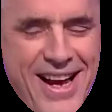

distance: 29.54104062961629
output/training_dataset/134.mp4/134.avi


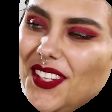

distance: 29.82951523151583
output/training_dataset/41.mp4/41.avi


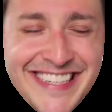

distance: 29.89479944574822
output/training_dataset/138.mp4/138.avi


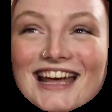

distance: 30.06125356632258
output/training_dataset/162.mp4/162.avi


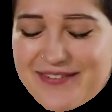


——————————————————
CLUSTER 2


distance: 28.04235228493336
output/training_dataset/157.mp4/157.avi


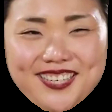

distance: 29.350966903977334
output/training_dataset/109.mp4/109.avi


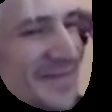

distance: 31.265621576912533
output/training_dataset/144.mp4/144.avi


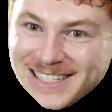

distance: 31.6350895608133
output/training_dataset/90.mp4/90.avi


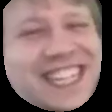

distance: 31.886806754257655
output/training_dataset/53.mp4/53.avi


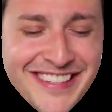


——————————————————
CLUSTER 3


distance: 22.485110633308523
output/training_dataset/12.mp4/12.avi


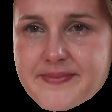

distance: 25.64075641826083
output/training_dataset/44.mp4/44.avi


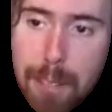

distance: 26.940744243156928
output/training_dataset/11.mp4/11.avi


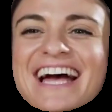

distance: 27.027267492016847
output/training_dataset/91.mp4/91.avi


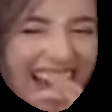

distance: 27.45254955828084
output/training_dataset/21.mp4/21.avi


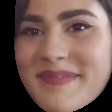


——————————————————
CLUSTER 4


distance: 24.698965029943967
output/training_dataset/136.mp4/136.avi


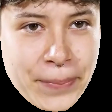

distance: 25.030125223412323
output/training_dataset/153.mp4/153.avi


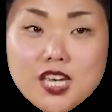

distance: 25.351091399281746
output/training_dataset/134.mp4/134.avi


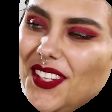

distance: 26.227472973455733
output/training_dataset/72.mp4/72.avi


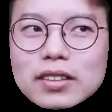

distance: 26.513183755933905
output/training_dataset/14.mp4/14.avi


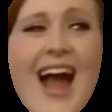


——————————————————
CLUSTER 5


distance: 23.258954715810546
output/training_dataset/69.mp4/69.avi


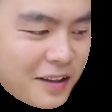

distance: 25.30570334947574
output/training_dataset/163.mp4/163.avi


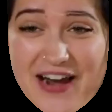

distance: 26.609665154166116
output/training_dataset/107.mp4/107.avi


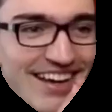

distance: 26.770430200405688
output/training_dataset/60.mp4/60.avi


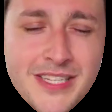

distance: 27.486294646660987
output/training_dataset/174.mp4/174.avi


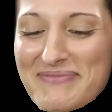


——————————————————
CLUSTER 6


distance: 23.70992813465354
output/training_dataset/156.mp4/156.avi


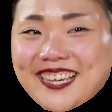

distance: 24.552851983991353
output/training_dataset/92.mp4/92.avi


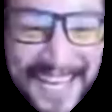

distance: 24.845215070687786
output/training_dataset/177.mp4/177.avi


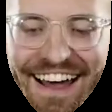

distance: 25.912064806172616
output/training_dataset/95.mp4/95.avi


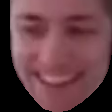

distance: 27.30298263224375
output/training_dataset/40.mp4/40.avi


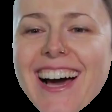


——————————————————
CLUSTER 7


distance: 24.37759333492742
output/training_dataset/193.mp4/193.avi


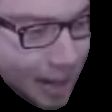

distance: 26.16416895972411
output/training_dataset/164.mp4/164.avi


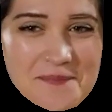

distance: 26.21229085325717
output/training_dataset/57.mp4/57.avi


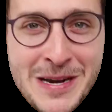

distance: 26.286519964658808
output/training_dataset/21.mp4/21.avi


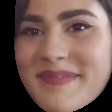

distance: 26.62361800912549
output/training_dataset/72.mp4/72.avi


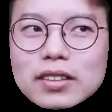


——————————————————
CLUSTER 8


distance: 26.282094305313557
output/training_dataset/20.mp4/20.avi


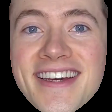

distance: 26.648901146830692
output/training_dataset/161.mp4/161.avi


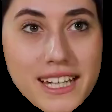

distance: 27.550685643819282
output/training_dataset/145.mp4/145.avi


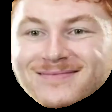

distance: 27.726413472649476
output/training_dataset/61.mp4/61.avi


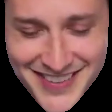

distance: 28.195545695885247
output/training_dataset/153.mp4/153.avi


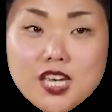


——————————————————
CLUSTER 9


distance: 25.790730430429516
output/training_dataset/169.mp4/169.avi


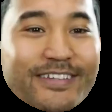

distance: 27.67027090262737
output/training_dataset/118.mp4/118.avi


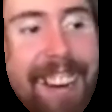

distance: 27.706083544652646
output/training_dataset/69.mp4/69.avi


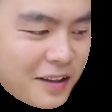

distance: 27.787592876524087
output/training_dataset/74.mp4/74.avi


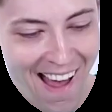

distance: 27.857367125863714
output/training_dataset/150.mp4/150.avi


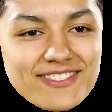


——————————————————
CLUSTER 10


distance: 28.340227295079018
output/training_dataset/68.mp4/68.avi


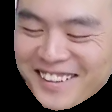

distance: 28.958270873968623
output/training_dataset/114.mp4/114.avi


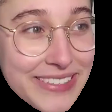

distance: 29.09896053156761
output/training_dataset/99.mp4/99.avi


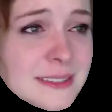

distance: 29.746119957131977
output/training_dataset/179.mp4/179.avi


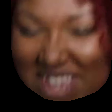

distance: 30.145552610670595
output/training_dataset/27.mp4/27.avi


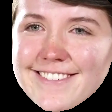


——————————————————
CLUSTER 11


distance: 26.137635896730984
output/training_dataset/199.mp4/199.avi


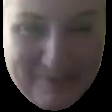

distance: 28.074108168386367
output/training_dataset/96.mp4/96.avi


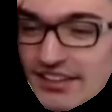

distance: 28.528294906424712
output/training_dataset/141.mp4/141.avi


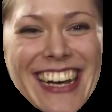

distance: 29.41721249310676
output/training_dataset/56.mp4/56.avi


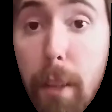

distance: 29.835012916014367
output/training_dataset/188.mp4/188.avi


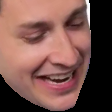


——————————————————
CLUSTER 12


distance: 23.76015191916374
output/training_dataset/217.mp4/217.avi


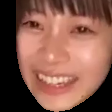

distance: 24.128941555517184
output/training_dataset/66.mp4/66.avi


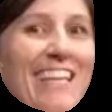

distance: 38.500254257259776
output/training_dataset/176.mp4/176.avi


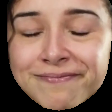

distance: 40.06454182915021
output/training_dataset/75.mp4/75.avi


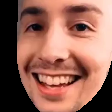

distance: 40.454064069036185
output/training_dataset/93.mp4/93.avi


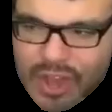


——————————————————
CLUSTER 13


distance: 25.56233748422367
output/training_dataset/103.mp4/103.avi


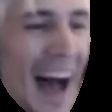

distance: 28.920636109485166
output/training_dataset/129.mp4/129.avi


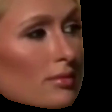

distance: 28.931242945330567
output/training_dataset/104.mp4/104.avi


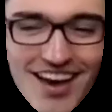

distance: 29.054524073589768
output/training_dataset/205.mp4/205.avi


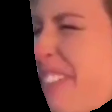

distance: 29.43000737401477
output/training_dataset/202.mp4/202.avi


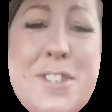


——————————————————
CLUSTER 14


distance: 22.565195026712228
output/training_dataset/5.mp4/5.avi


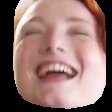

distance: 24.59158242358664
output/training_dataset/77.mp4/77.avi


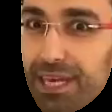

distance: 26.786171540836754
output/training_dataset/176.mp4/176.avi


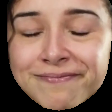

distance: 35.0478246691032
output/training_dataset/90.mp4/90.avi


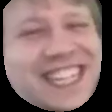

distance: 35.54817786709585
output/training_dataset/75.mp4/75.avi


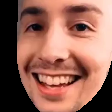


——————————————————
CLUSTER 15


distance: 27.844638082491986
output/training_dataset/6.mp4/6.avi


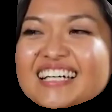

distance: 27.922647853903353
output/training_dataset/86.mp4/86.avi


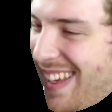

distance: 27.967031901059997
output/training_dataset/136.mp4/136.avi


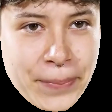

distance: 28.905206076301216
output/training_dataset/71.mp4/71.avi


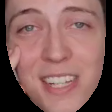

distance: 29.057539208654706
output/training_dataset/42.mp4/42.avi


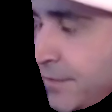

In [50]:
prototype_images(multiple_prototypes_all_features)